In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import optimize
import cplot  #for domain coloring


matplotlib.rc('font', size=16)

# adsorption model $\mathbf{m}(\mathbf{p})$

In [25]:
# Langmuir params for MOF 1
K1 = [0.1, 0.5]
M1 = 1.0
# Langmuir params for MOF 2
K2 = [0.7, 0.3]
M2 = 2.0

def m_1(p):
    return M1 * np.dot(K1, p) / (1 + np.dot(K1, p))

def m_2(p):
    return M2 * np.dot(K2, p) / (1 + np.dot(K2, p))

In [20]:
p = np.array([1.2, -3])
np.any(p < 0) 
m_1(p)

nan

# inverse of adsorption model $\mathbf{p}(\mathbf{m})$

In [3]:
def p_of_m(m_0, p_lb, p_ub): 
    # we want this function to return a zero vector
    #  it takes in a pressure p
    #  it outputs the corresponding difference between the response and the response m_0 that we find
    #  if we find the right p that gives us the response m_0, then this will be the zero vector
    def f(p):
        return [m_1(p) - m_0[0], m_2(p) - m_0[1]]
    sol = optimize.root(f, [1.0, 1.0])
    p = sol.x
    # return nan if p less than lower bound, greater than upper bound
    if p[0] < p_lb or p[1] < p_lb or p[0] > p_ub or p[1] > p_ub:
        return np.array([np.nan, np.nan])
    if not sol.success:
        return np.array([np.nan, np.nan])
#     assert np.all(np.isclose([m_1(p), m_2(p)], m_0))
    return p

p_of_m([0.2, 0.5], 0, 5)

array([0.28645833, 0.44270833])

In [4]:
def get_meshgrid(x_max, y_max, nb_pts=200):
    return np.meshgrid(np.linspace(0, x_max, num=nb_pts),
                       np.linspace(0, y_max, num=nb_pts))

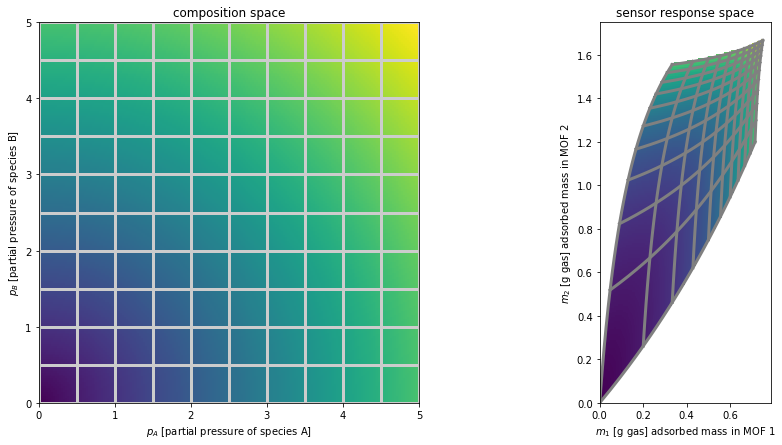

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].set_title("composition space")
ax[0].set_xlabel("$p_A$ [partial pressure of species A]")
ax[0].set_ylabel("$p_B$ [partial pressure of species B]")

# shared params
p_max = 5.0 # largest pressure we go to.

###
#   sensor response space
###
ax[1].set_aspect('equal', 'box')
ax[1].set_title("sensor response space")
ax[1].set_xlabel("$m_1$ [g gas] adsorbed mass in MOF 1")
ax[1].set_ylabel("$m_2$ [g gas] adsorbed mass in MOF 2")

###
#   draw grid lines and their mapping
###
dp = 0.5 # spacing between grid lines
nb_pts = 50
# these arrays will contain the correponding reponses to each point on the lines.
m1 = np.zeros(nb_pts)
m2 = np.zeros(nb_pts)
for i in range(int(p_max / dp)+1):
    ###
    #   x = constant (vertical) grid lines
    ###
    p_a = i * dp # p_a is constant here.
    # plot the line in composition space
    ax[0].plot([p_a, p_a], [0, p_max], color="0.8", lw=3)
    
    # plot the image of the line in sensor response space
    p_b = np.linspace(0.0, p_max, nb_pts)

    # loop through points on the line
    for j in range(nb_pts):
        # get vector on this line
        p_on_line = np.array([p_a, p_b[j]])
        # compute the adsorbed mass in the two MOFs when exposed to this gas composition
        m1[j] = m_1(p_on_line)
        m2[j] = m_2(p_on_line)
    ax[1].plot(m1, m2, color="gray", lw=3)
    
    ###
    #   y = constant (horizontal) grid lines
    ###
    p_b = i * dp # p_b is constant here.
    # plot the line in composition space
    ax[0].plot([0, p_max], [p_b, p_b], color="0.8", lw=3)
    
    # plot the image of the line in sensor response space
    p_a = np.linspace(0.0, p_max, nb_pts)

    # loop through points on the line
    for j in range(nb_pts):
        # get vector on this line
        p_on_line = np.array([p_a[j], p_b])
        # compute the adsorbed mass in the two MOFs when exposed to this gas composition
        m1[j] = m_1(p_on_line)
        m2[j] = m_2(p_on_line)
    ax[1].plot(m1, m2, color="gray", lw=3)
    
    
###
#   color the plane
#   color represents.
###

# lay a grid in response and composition space
pa, pb = get_meshgrid(p_max, p_max)
m1, m2 = get_meshgrid(ax[1].get_xlim()[1], ax[1].get_ylim()[1])

z_composition = np.sqrt(pb ** 2 + pa ** 2)
z_response = np.zeros(np.shape(m1))
for i in range(np.shape(z_response)[0]):
    for j in range(np.shape(z_response)[1]):
        m_0 = [m1[i, j], m2[i, j]]
        p = p_of_m(m_0, 0, p_max) 
        z_response[i, j] = np.linalg.norm(p)

ax[0].pcolormesh(pa, pb, z_composition)
ax[1].pcolormesh(m1, m2, z_response)
    
ax[1].set_aspect('equal', 'box')
ax[0].set_aspect('equal', 'box')

In [6]:
np.linspace(0, p_max, num=100)

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [7]:
np.shape(m1)

(200, 200)

In [8]:
np.shape(m2)

(200, 200)

In [9]:
np.zeros((np.size(m1), np.size(m2)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(0, 9.959558823529418)

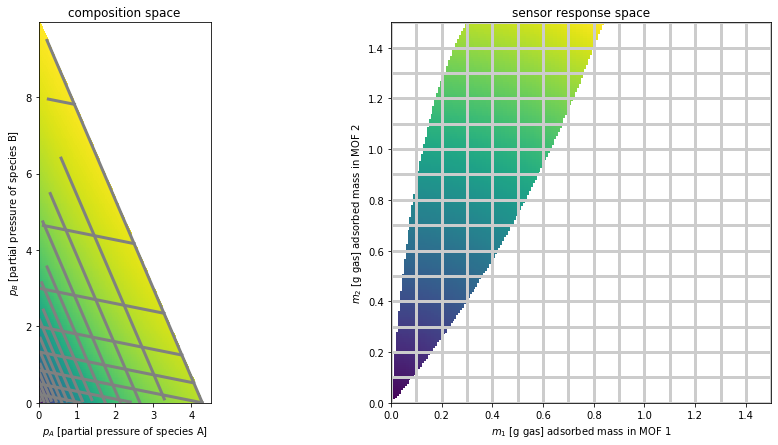

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].set_title("composition space")
ax[0].set_xlabel("$p_A$ [partial pressure of species A]")
ax[0].set_ylabel("$p_B$ [partial pressure of species B]")

# shared params
m_max = 1.5 # largest mass we go to.

###
#   sensor response space
###
ax[1].set_aspect('equal', 'box')
ax[1].set_title("sensor response space")
ax[1].set_xlabel("$m_1$ [g gas] adsorbed mass in MOF 1")
ax[1].set_ylabel("$m_2$ [g gas] adsorbed mass in MOF 2")

###
#   draw grid lines and their mapping
###
dm = 0.1 # spacing between grid lines
nb_pts = 50
# these arrays will contain the correponding compositions to each point on the lines.
p_a = np.zeros(nb_pts)
p_b = np.zeros(nb_pts)

for i in range(int(m_max / dm)+1):
    ###
    #   x = constant (vertical) grid lines
    ###
    m1 = i * dm # m2 is constant here.
    # plot the line in composition space
    ax[1].plot([m1, m1], [0, m_max], color="0.8", lw=3)
 
    # plot the image of the line in composition space
    m2 = np.linspace(0.0, m_max, nb_pts)

    # loop through points on the line
    for j in range(nb_pts):
        # get vector on this line
        m_on_line = np.array([m1, m2[j]])
        # compute the composition in the gas space when MOFs have this much gas absorbed
        p_a[j], p_b[j] = p_of_m(m_on_line, 0, np.Inf) ### is -1.001 an okay value for p_lb?
    ax[0].plot(p_a, p_b, color="gray", lw=3)

    ###
    #   y = constant (horizontal) grid lines
    ###
    m2 = i * dm # m1 is constant here.
    # plot the line in composition space
    ax[1].plot([0, m_max], [m2, m2], color="0.8", lw=3)

    # plot the image of the line in composition space
    m1 = np.linspace(0.0, m_max, nb_pts)
    
    # loop through points on the line
    for j in range(nb_pts):
        # get vector on this line
        m_on_line = np.array([m1[j], m2])
        # compute the composition in the gas space when MOFs have this much gas absorbed
        p_a[j], p_b[j] = p_of_m(m_on_line, 0, np.Inf)  ### is -1.001 an okay value for p_lb?
    ax[0].plot(p_a, p_b, color="gray", lw=3)
    
    
    
###
#   color the plane
#   color represents.
###

# lay a grid in response and composition space
m1, m2 = get_meshgrid(m_max, m_max)
pa, pb = get_meshgrid(ax[0].get_xlim()[1], ax[0].get_ylim()[1])

z_response = np.sqrt(m1 ** 2 + m2 ** 2)

for i in range(np.shape(z_response)[0]):
    for j in range(np.shape(z_response)[1]):
        m_0 = [m1[i, j], m2[i, j]]
        p = p_of_m(m_0, 0, np.Inf) 
        if np.any(np.isnan(p)):
            z_response[i, j] = np.nan
        else:
            z_response[i, j] = np.linalg.norm(m_0)

z_composition = np.zeros(np.shape(pa))

for i in range(np.shape(z_composition)[0]):
    for j in range(np.shape(z_composition)[1]):
        p_0 = np.array([pa[i, j], pb[i, j]])
        m = np.array([m_1(p_0), m_2(p_0)])
        if np.any(m > m_max):
            z_composition[i, j] = np.nan
        else:
            z_composition[i, j] = np.linalg.norm(m)    


ax[1].pcolormesh(m1, m2, z_response)    
ax[0].pcolormesh(pa, pb, z_composition)
    
ax[1].set_aspect('equal', 'box')
ax[0].set_aspect('equal', 'box')

# set composition space to exclude negative pressures 
ax[0].set_xlim(xmin=0)
ax[0].set_ylim(ymin=0)

# TODO 
# can we make a 2D colormap where each (x, y) pt gets a unique color? 
# so a sequential map for x, sequential map for y? but not cyclic.
# for inverse mapping: rid of gray lines in white spaces in sensor response space; 
# draw boundary of sensor response space and its mapping into composition space

# Messing around with domain coloring

In [11]:
cplot.show(numpy.tan, -5, +5, -5, +5, 100, 100)

# There is a tripcolor function as well for triangulated 2D domains
# cplot.tripcolor(triang, z)

# The function get_srgb1 returns the SRGB1 triple for every complex input value.
# (Accepts arrays, too.)
z = 2 + 5j
val = cplot.get_srgb1(z)

NameError: name 'numpy' is not defined

In [ ]:
import matplotlib.transforms as mtransforms


def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',   # figure out how to use imshow
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()